<a href="https://colab.research.google.com/github/rishankumb/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

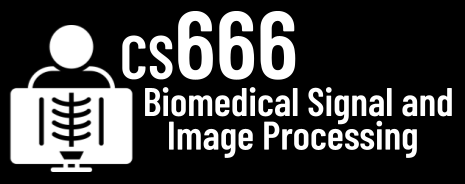

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [3]:
!pip install biosppy
import biosppy as bs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [5]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [6]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

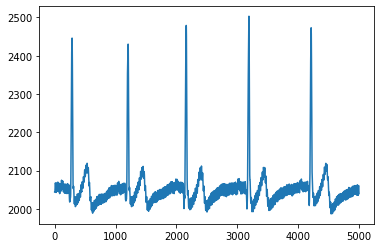

In [7]:
plt.plot(signal[0:5000])

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [8]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 60 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [9]:
ecgout = bs.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)  ### TODO


In [10]:
ecgout[1]

array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748])

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [11]:
SAMPLING_RATE

1000

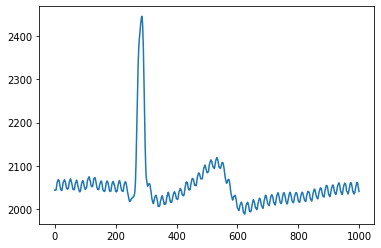

In [12]:
first_to_query = 0

# first_second = signal[0:1000]
first_second = signal[first_to_query*SAMPLING_RATE:(first_to_query+1)*SAMPLING_RATE]

plt.plot(first_second) ### TODO plot unfiltered signal

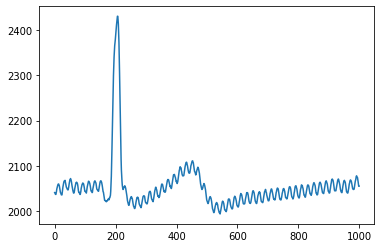

In [13]:
second_to_query = 1

second_second = signal[second_to_query*SAMPLING_RATE:(second_to_query+1)*SAMPLING_RATE]

plt.plot(second_second) ### TODO plot unfiltered signal

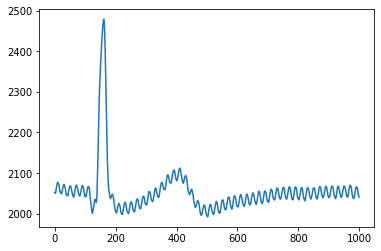

In [14]:
third_to_query = 2

third_second = signal[third_to_query*SAMPLING_RATE:(third_to_query+1)*SAMPLING_RATE]

plt.plot(third_second) ### TODO plot unfiltered signal

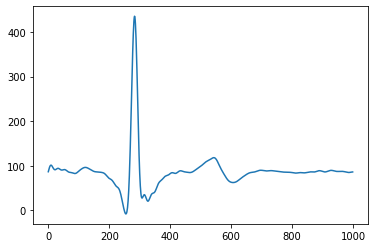

In [15]:
first_to_query = 0

first_filtered_second = ecgout[1][first_to_query*SAMPLING_RATE:(first_to_query+1)*SAMPLING_RATE]
# first_filtered_second = ecgout[1][0:1000]

plt.plot(first_filtered_second)### TODO plot filtered signal

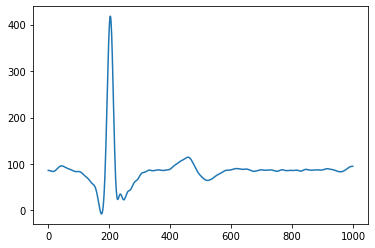

In [16]:
second_filtered_second = ecgout[1][second_to_query*SAMPLING_RATE:(second_to_query+1)*SAMPLING_RATE]

plt.plot(second_filtered_second)### TODO plot filtered signal

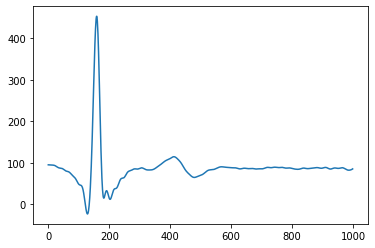

In [17]:
# first_to_query = 0

third_filtered_second = ecgout[1][third_to_query*SAMPLING_RATE:(third_to_query+1)*SAMPLING_RATE]
# first_filtered_second = ecgout[1][0:1000]

plt.plot(third_filtered_second)### TODO plot filtered signal

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

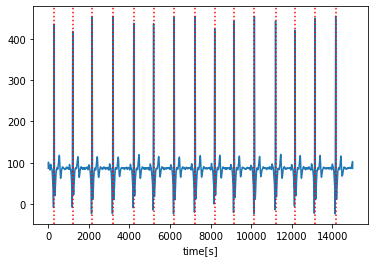

In [18]:
plt.xlabel("time[s]")
plt.plot(ecgout[1])### TODO

# plt.axvline(x = ecgout[2][1], color = 'r', ls=':')

rPeaks = ecgout[2]
rrTachogram = []
prevPeak = rPeaks[0]
for peak in rPeaks:
	plt.axvline(x = peak, color = 'r', ls=':')
	# prevPeak = peak

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [19]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

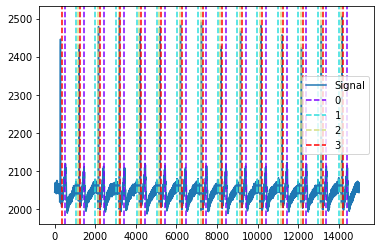

In [20]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal, rPeaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:], 
                       waves_peak['ECG_P_Peaks'][:],
                       waves_peak['ECG_Q_Peaks'][:],
                       waves_peak['ECG_S_Peaks'][:]], signal[:])

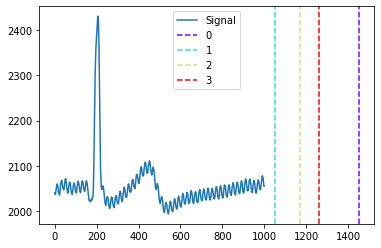

In [21]:
# _, waves_peak = nk.ecg_delineate(signal, rPeaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][1:2], 
                       waves_peak['ECG_P_Peaks'][1:2],
                       waves_peak['ECG_Q_Peaks'][1:2],
                       waves_peak['ECG_S_Peaks'][1:2]], signal[1000:2000])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


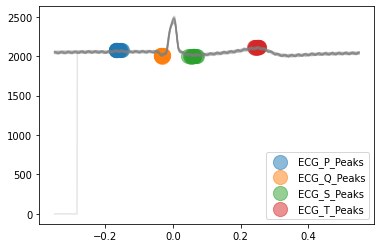

In [22]:
_, waves_peak = nk.ecg_delineate(signal, 
                                 rPeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [23]:
# TODO Does the detection work well?

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


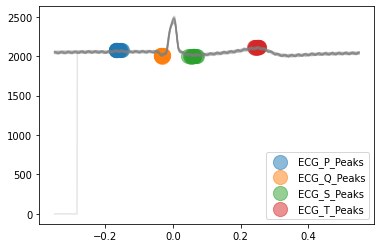

In [24]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

_, waves_peak = nk.ecg_delineate(signal, 
                                 rPeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

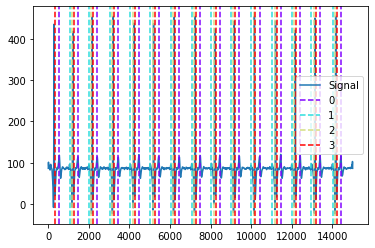

In [25]:
_, waves_peak = nk.ecg_delineate(signal, rPeaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:], 
                       waves_peak['ECG_P_Peaks'][:],
                       waves_peak['ECG_Q_Peaks'][:],
                       waves_peak['ECG_S_Peaks'][:]], ecgout[1][:])

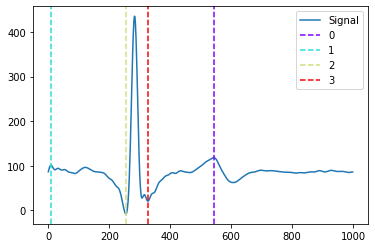

In [64]:
_, waves_peak = nk.ecg_delineate(ecgout[1], rPeaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][0:1], 
                       waves_peak['ECG_P_Peaks'][0:1],
                       waves_peak['ECG_Q_Peaks'][0:1],
                       waves_peak['ECG_S_Peaks'][0:1]], ecgout[1][0:1000])

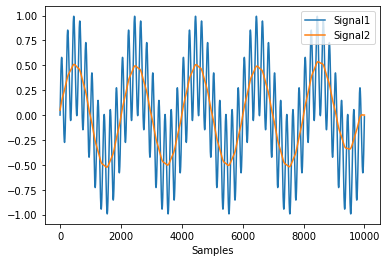

In [62]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
cleaned = nk.signal_filter(signal, lowcut=0.2, highcut=2.0)

plot = nk.signal_plot([signal, cleaned])

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#